## 8_2 KNN using SKLEARN

In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/auto.csv')

In [2]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1,27.0
388,4,97.0,52.0,2130.0,24.6,82,2,44.0
389,4,135.0,84.0,2295.0,11.6,82,1,32.0
390,4,120.0,79.0,2625.0,18.6,82,1,28.0


## 데이터 나누기

In [3]:
df=pd.get_dummies(df,columns=['origin'])
y=df['mpg']
X=df.drop(columns=['mpg'])

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_validate

kfold=KFold(n_splits=5, shuffle=True)
for i in range(2,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X,y)
    result=cross_validate(X=X,y=y,cv=kfold,scoring=['r2','neg_mean_squared_error'],estimator=knn)
    print(i, result['test_r2'].mean(), result['test_neg_mean_squared_error'].mean())

2 0.6797594726919363 -19.237774748458293
3 0.6944465392419957 -18.36520610191496
4 0.7033332859627082 -17.97586256491399
5 0.7057280536122711 -17.91522710808179
6 0.7178424260160648 -16.852661293230916
7 0.7159131283940475 -17.197017758612695
8 0.7108417300458507 -17.102078677783187
9 0.6955390945822636 -18.58048487143424
10 0.7087913028226887 -17.15627612463486
11 0.7087214107376305 -17.90813601626605
12 0.7198911371907485 -16.970477552832772
13 0.7012888995666013 -17.57505562821569
14 0.6989687748186186 -17.61990598897787
15 0.6915317610879951 -17.7472131443615
16 0.7058142249049328 -17.815429054842177
17 0.7055086688761227 -17.739997139516785
18 0.714089683235283 -17.358072007445077
19 0.700289178017844 -18.01948452628522
20 0.6972117029725551 -18.075763697663092
21 0.7038017709439115 -17.81388710706613
22 0.7044666657545733 -17.763036241184977
23 0.6997682356308015 -17.996384728892064
24 0.708189293359933 -17.536536049239963
25 0.7029127847270469 -18.085170006621222
26 0.7081071420

## 데이터 정규화

In [6]:
X_norm = (X-X.mean())/X.std()

In [17]:
from sklearn.model_selection import KFold, cross_validate
kfold=KFold(n_splits=5, shuffle=True)
train_mse=[]
test_mse=[]
for i in range(2,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X,y)
    result=cross_validate(X=X_norm,y=y,
                          cv=kfold,scoring=['r2','neg_mean_squared_error'],
                          estimator=knn,
                          return_train_score=True)
    print(i, result['test_r2'].mean(), result['test_neg_mean_squared_error'].mean())
    train_mse.append(-1*result['train_neg_mean_squared_error'].mean())
    test_mse.append(-1*result['test_neg_mean_squared_error'].mean())
    

2 0.8253141977573675 -10.382416666666668
3 0.8424074927774905 -9.250220130549247
4 0.8434020066176761 -9.151905753002273
5 0.848329764662631 -9.464497734501787
6 0.8542224181358851 -8.698043970211693
7 0.841721148521068 -9.389417582417584
8 0.8448756115360748 -9.32796405387861
9 0.8420490689123185 -9.695081318795804
10 0.8215807120716544 -10.816250149302176
11 0.8177363886631873 -11.03503918444425
12 0.8232257270113171 -10.603584789390169
13 0.8268490973876876 -10.398019013268955
14 0.8173513707498339 -10.798887596129006
15 0.8056857594283574 -11.533641778643297
16 0.8117421737846126 -11.377603873793005
17 0.8079477477053926 -11.463897712174965
18 0.8065206518326586 -11.932052838784909
19 0.8088209746270636 -11.575708323106232
20 0.7922560524116797 -12.642928693605972
21 0.7859330026784801 -12.96010929248904
22 0.7813975460188689 -12.836600227735442
23 0.7878329563664421 -12.732027325230742
24 0.7814904100168796 -13.290763692231058
25 0.7890504641511228 -12.898220417267117
26 0.7803747

## 하이퍼 패러미터의 영향

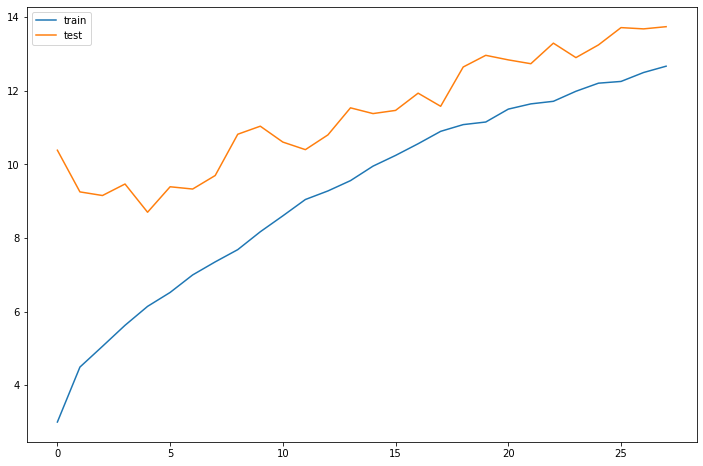

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(train_mse, label='train')
plt.plot(test_mse, label='test')
plt.legend()


## MinMax Scaling

In [8]:
X_scale = (X-X.min())/(X.max()-X.min())

In [9]:
from sklearn.model_selection import KFold, cross_validate
kfold=KFold(n_splits=5, shuffle=True)
for i in range(2,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_scale,y)
    result=cross_validate(X=X_norm,y=y,cv=kfold,scoring=['r2','neg_mean_squared_error'],estimator=knn)
    print(i, result['test_r2'].mean(), result['test_neg_mean_squared_error'].mean())

2 0.8322510072637641 -10.06419636481662
3 0.8379217027744683 -9.439669407479535
4 0.8519906321565027 -8.807516411067835
5 0.8537874201107725 -8.827361389159364
6 0.8501233549086956 -9.006559324173248
7 0.8574640857152851 -8.687916108605076
8 0.8465220453477904 -9.110585179324893
9 0.8435466419383457 -9.438352238530861
10 0.8320787546643981 -9.990580246673158
11 0.8244850878055837 -10.550419212931297
12 0.8342404935861726 -10.079098793230914
13 0.8189029913922393 -10.992887036215475
14 0.8105823052532035 -11.355702890990866
15 0.8091351536282726 -11.3995135302391
16 0.8019819321481425 -11.596722689214134
17 0.8071132119273023 -11.567979412831633
18 0.7981634471905033 -12.20248602646247
19 0.7867740380178099 -12.332544558238727
20 0.7944052238833949 -12.462125963972735
21 0.7891318645138108 -13.254316544014554
22 0.7890569739348041 -12.588602956403015
23 0.7816284397155341 -12.95580766868587
24 0.7846517602017278 -12.989497408511847
25 0.7814671797050501 -13.207741040441416
26 0.77702920